# Первичное исследование данных

In [12]:
import re
import ast
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

Объединим имеющиеся датасеты со спаршенными данными о фильмах

In [2]:
united_df = pd.read_csv('prepared_data.csv')

Имеем следующие столбцы:

In [3]:
united_df.columns

Index(['kinopoiskId', 'imdbId', 'posterUrl', 'posterUrlPreview', 'coverUrl',
       'logoUrl', 'ratingImdb', 'webUrl', 'year', 'filmLength', 'slogan',
       'description', 'shortDescription', 'editorAnnotation',
       'isTicketsAvailable', 'productionStatus', 'type', 'ratingMpaa',
       'ratingAgeLimits', 'countries', 'genres', 'startYear', 'endYear',
       'serial', 'shortFilm', 'completed', 'lastSync', 'name'],
      dtype='object')

In [34]:
united_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   kinopoiskId         1685 non-null   float64
 1   imdbId              1571 non-null   object 
 2   posterUrl           1685 non-null   object 
 3   posterUrlPreview    1685 non-null   object 
 4   coverUrl            378 non-null    object 
 5   logoUrl             272 non-null    object 
 6   ratingImdb          1685 non-null   float64
 7   webUrl              1685 non-null   object 
 8   year                1685 non-null   float64
 9   filmLength          1640 non-null   float64
 10  slogan              1319 non-null   object 
 11  description         1416 non-null   object 
 12  shortDescription    373 non-null    object 
 13  editorAnnotation    3 non-null      object 
 14  isTicketsAvailable  1685 non-null   bool   
 15  productionStatus    0 non-null      float64
 16  type  

В первую очередь нас интересуют жанры

In [4]:
united_df['genres']

0       ['мелодрама', 'приключения', 'комедия', 'музык...
1                                ['фантастика', 'боевик']
2       ['драма', 'детектив', 'приключения', 'комедия'...
3                                ['мелодрама', 'комедия']
4                                 ['триллер', 'криминал']
                              ...                        
1680                   ['фэнтези', 'комедия', 'семейный']
1681               ['криминал', 'приключения', 'комедия']
1682                                          ['комедия']
1683                                 ['комедия', 'спорт']
1684                        ['драма', 'комедия', 'спорт']
Name: genres, Length: 1685, dtype: object

Узнаем максимальную длины полей

In [37]:
max(united_df['name'].str.len())

77

In [38]:
max(united_df['slogan'].str.len())

413.0

In [39]:
max(united_df['description'].str.len())


1792.0

"Распакуем" данные, чтобы оценить количество фильмов каждого из жанров и использовать их в дальнейшем

In [35]:
fixed_genres_col = []
for index, row in united_df.iterrows():
    items = re.findall(": '(.*?)'}", row['genres'])
    fixed_genres_col.append(items)

In [37]:
united_df['genres'] = fixed_genres_col

In [18]:
all_genres_everywhere = []
for index, row in united_df.iterrows():
    for i in ast.literal_eval(row['genres']):
        all_genres_everywhere.append(i)

Узнаем максимальную длину жанра фильма

In [33]:
max_len = 0
for genre in all_genres_everywhere:
    if len(genre) > max_len:
        max_len = len(genre)
        print(genre, max_len)

мелодрама 9
приключения 11
документальный 14
короткометражка 15


In [20]:
Counter(all_genres_everywhere)

Counter({'мелодрама': 393,
         'приключения': 201,
         'комедия': 693,
         'музыка': 42,
         'семейный': 118,
         'фантастика': 156,
         'боевик': 259,
         'драма': 916,
         'детектив': 137,
         'триллер': 349,
         'криминал': 294,
         'фэнтези': 103,
         'спорт': 34,
         'биография': 71,
         'военный': 95,
         'история': 61,
         'ужасы': 93,
         'вестерн': 66,
         'фильм-нуар': 30,
         'мюзикл': 60,
         'мультфильм': 62,
         'аниме': 5,
         'документальный': 29,
         'короткометражка': 154})

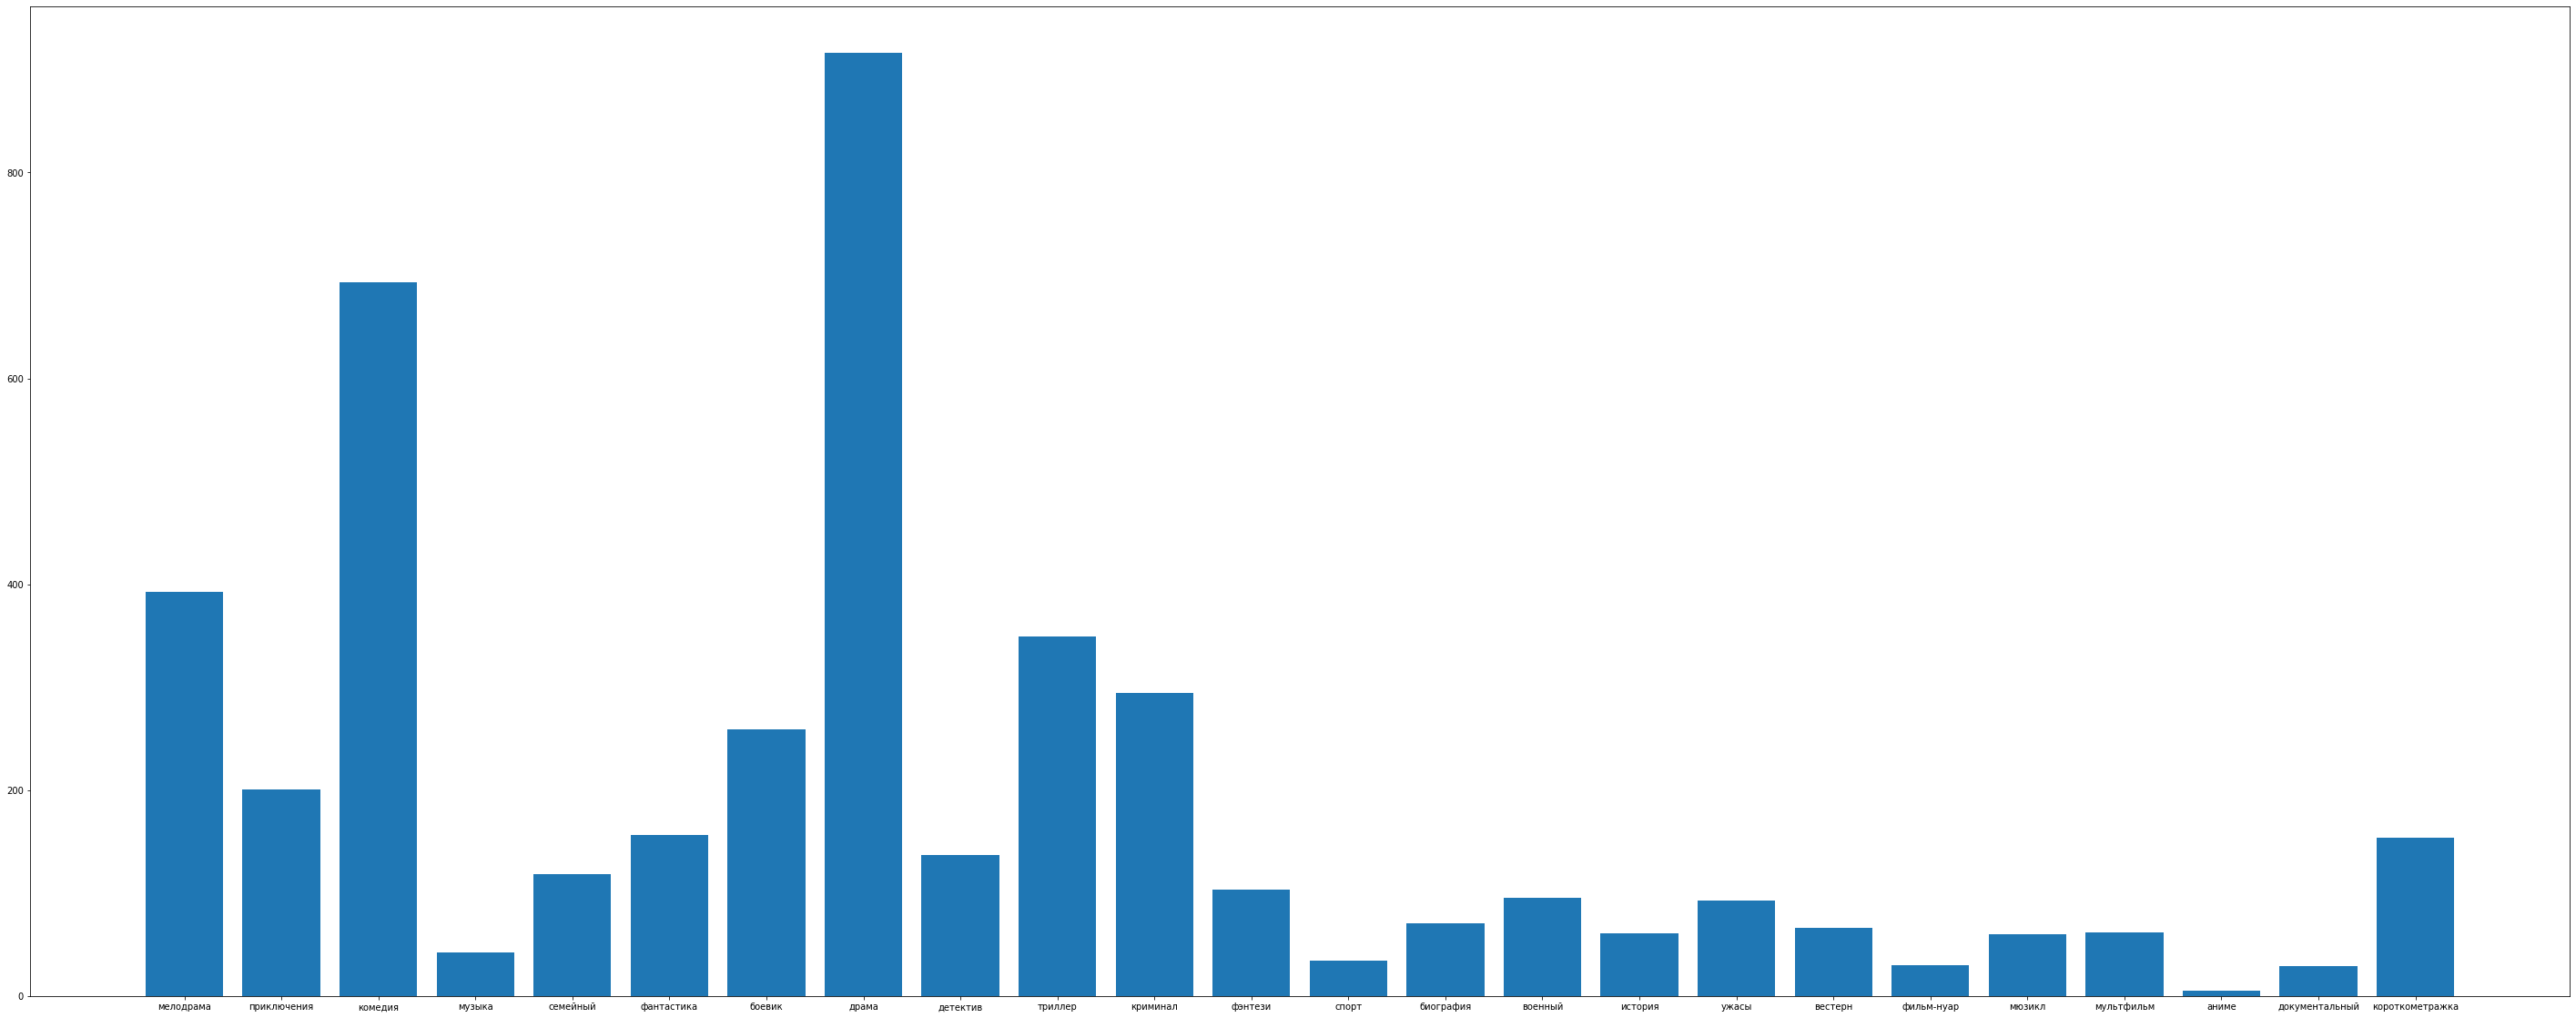

In [21]:
plt.figure(figsize=(50,20))
plt.bar(list(Counter(all_genres_everywhere).keys()), Counter(all_genres_everywhere).values())
plt.show()

Довольно сильный дисбаланс жанров. Для разработки MVP имеет смысл убрать фильмы жанра аниме, так как их всего 5, с остальными жанрами можно работать

Для сортировки по рейтингу необходимо подобрать то, какой из столбцов, отражающих оценки на различных сервисах мы будем использовть. Рассмотрим столбцы 'ratingGoodReview', 
       'ratingKinopoisk', 'ratingImdb',
        'ratingFilmCritics',
        'ratingAwait', 
       'ratingRfCritics'

In [94]:
united_df['ratingGoodReview'].isnull().sum()

621

In [73]:
united_df['ratingGoodReview'].value_counts()

100.0    305
75.0      58
87.5      36
83.3      36
50.0      34
        ... 
80.2       1
98.9       1
95.9       1
98.4       1
76.1       1
Name: ratingGoodReview, Length: 226, dtype: int64

In [95]:
united_df['ratingKinopoisk'].isnull().sum()

466

In [75]:
united_df['ratingKinopoisk'].value_counts()

6.8    73
7.1    73
7.0    71
7.2    65
6.9    65
7.8    64
6.7    63
7.7    61
7.6    60
7.3    56
6.6    55
8.0    50
7.4    44
8.1    42
7.9    42
7.5    41
6.1    40
6.3    34
6.0    34
6.2    32
6.4    32
6.5    30
5.7    27
5.9    25
5.8    17
5.6    16
5.3    13
8.5    12
8.2    12
5.0     9
5.2     9
8.3     9
8.6     8
5.4     7
5.5     7
4.8     5
5.1     5
4.7     5
4.9     4
8.4     3
4.4     3
4.2     3
8.7     2
4.5     2
9.1     2
8.8     2
2.9     1
4.1     1
3.8     1
3.4     1
8.9     1
4.6     1
2.8     1
4.3     1
4.0     1
3.0     1
Name: ratingKinopoisk, dtype: int64

In [96]:
united_df['ratingImdb'].isnull().sum()

72

In [77]:
united_df['ratingImdb'].value_counts()

6.4    84
6.2    73
6.6    69
6.1    66
6.7    65
       ..
3.2     1
3.3     1
9.3     1
2.5     1
2.4     1
Name: ratingImdb, Length: 68, dtype: int64

In [97]:
united_df['ratingFilmCritics'].isnull().sum()

778

In [87]:
united_df['ratingFilmCritics'].value_counts()

6.3    32
7.3    30
5.8    30
6.0    29
6.9    29
       ..
2.7     1
2.5     1
9.6     1
3.3     1
2.9     1
Name: ratingFilmCritics, Length: 73, dtype: int64

In [98]:
united_df['ratingAwait'].isnull().sum()

1810

In [88]:
united_df['ratingAwait'].value_counts()

Series([], Name: ratingAwait, dtype: int64)

In [99]:
united_df['ratingRfCritics'].isnull().sum()

1748

In [89]:
united_df['ratingRfCritics'].value_counts()

100.0000    26
80.0000      8
75.0000      5
50.0000      4
66.6667      4
33.3333      3
71.4286      2
60.0000      2
0.0000       1
83.3333      1
20.0000      1
30.0000      1
85.7143      1
90.0000      1
42.8571      1
55.5556      1
Name: ratingRfCritics, dtype: int64

В столбце ratingImdb меньше всего пропусков, оценки от 2.8 до 9.1. В районе 7 баллов - пик распределения. Столбец предположительно подходит для сортировки

Дизайн-ревью рек. системы: Матрица n на n из фильмов, если у фильмов нет пересечений по жанрам, в пересечении их строк стоит 0, если 1, то 1 и т.д. В рекомендацию идут фильмы с наибольшим значением в пересечении (5 штук) - также происходит сортировка по оценке - столбец ratingImdb